The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

['United States of America', 'Male']
Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999     True
Name: US_born_winners, Length: 1000, dtype: bool
0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int64
    decade  US_born_winners
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9

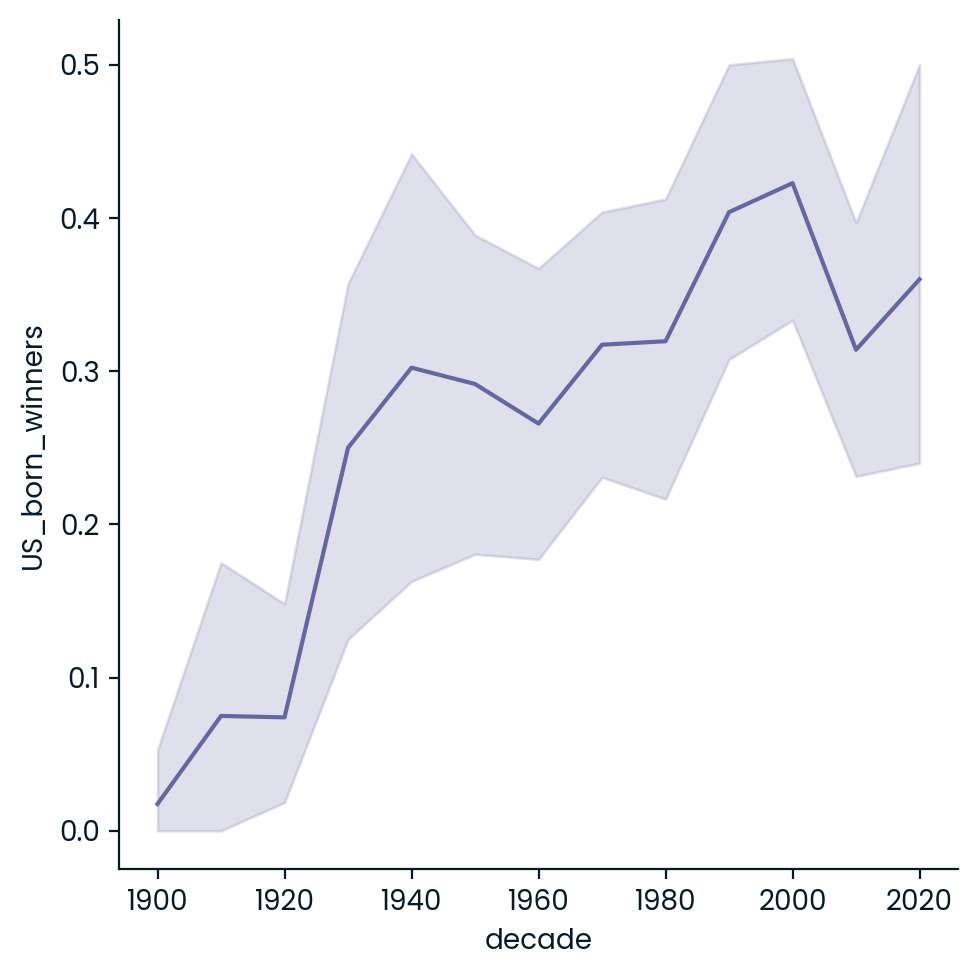

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999     True
Name: US_born_winners, Length: 1000, dtype: bool
    decade  US_born_winners
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000
{2020: 'Literature'}


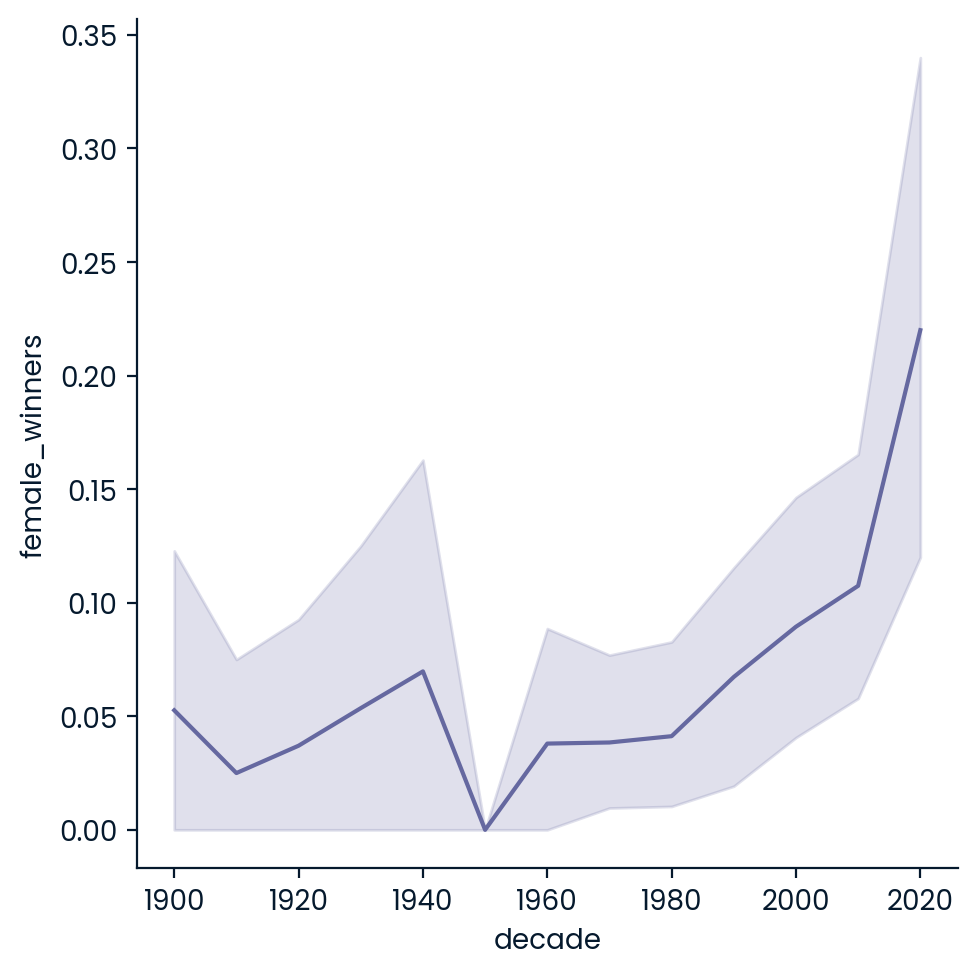


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [38]:
# Loading in required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


# Start coding here!
df = pd.read_csv("data/nobel.csv")

#1 What is the most commonly awarded gender and birth country?
#Store your answers as string variables top_gender and top_country.
top_gender= df["sex"].mode()[0]
top_country= df['birth_country'].mode()[0]
print([top_country, top_gender])
print(df.columns)


#2 Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
df["US_born_winners"]= df["birth_country"]== 'United States of America'
print(df["US_born_winners"])

df["decade"]= (np.floor(df["year"]/10)*10).astype(int) # np.floor se usa para redondear al numero hacia abajo mas cercano
print(df["decade"])

ratio_of_USwinners= df.groupby("decade", as_index=False)["US_born_winners"].mean()
print(ratio_of_USwinners)

max_decade_usa= ratio_of_USwinners[ratio_of_USwinners["US_born_winners"] == ratio_of_USwinners["US_born_winners"].max()]['decade'].values[0]

print(max_decade_usa)

ax1= sns.relplot(x="decade", y="US_born_winners", kind="line", data= df)

plt.show()


#3 Which decade and Nobel Prize category combination had the highest proportion of female laureates?

df["female_winners"]= df["sex"]== 'Female'
print(df["US_born_winners"])



ratio_of_female_winners= df.groupby(["decade", 'category'], as_index=False)["female_winners"].mean()
print(ratio_of_USwinners)

max_female_decade_category = ratio_of_female_winners[ratio_of_female_winners['female_winners'] == ratio_of_female_winners['female_winners'].max()][['decade', 'category']]

max_female_dict= {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

print(max_female_dict)

ax2= sns.relplot(x='decade', y="female_winners", kind="line", data= df)

plt.show()




# Who was the first woman to receive a Nobel Prize, and in what category?
new_df= df[df["female_winners"]]
min_row = new_df[new_df['year'] == new_df['year'].min()]
first_woman_name=  min_row['full_name'].values[0]
first_woman_category= new_df['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Which individuals or organizations have won more than one Nobel Prize throughout the years?


counts= df['full_name'].value_counts()
repeats= counts[counts >= 2].index
repeat_list= list(repeats)
print(repeat_list)